### KNN

In [1]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Create Dataset

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000, n_features=100, n_informative=50, n_classes=2, random_state=42)

In [4]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.775753,-0.689152,0.796748,5.832802,0.166642,-0.370286,1.029013,-0.916342,-0.828912,-0.630228,...,0.712935,-0.481282,-3.044595,1.134203,1.895551,-5.103705,-5.192116,1.420665,4.904625,1.482548
1,0.976047,1.145966,-1.313398,-1.088456,-1.100038,0.076909,-1.138042,-0.321329,2.124360,-1.125576,...,-0.666357,3.666244,4.288094,-2.411988,0.262242,2.150674,1.602384,0.120861,3.031421,-11.648365
2,-1.293209,0.250902,0.052237,1.015275,-0.035133,-0.745641,-0.354716,0.820165,0.020324,-0.787845,...,-0.719824,8.621626,-4.100154,-6.023047,-0.615285,-0.374391,2.159539,2.321285,-4.825314,3.936870
3,-0.562862,1.385232,1.384484,1.377917,0.113049,-1.734191,0.653683,-0.463020,-1.455195,0.116057,...,-1.351671,-1.382900,-0.680760,-6.487838,0.723074,-3.164689,-4.605753,-0.453455,-2.322712,-1.339804
4,-0.410267,-1.444200,0.978697,3.335470,-1.345575,0.461210,0.422925,-0.200090,-0.004353,0.152290,...,-1.291344,-5.283795,-9.007256,0.757051,0.424198,0.437361,2.633159,1.329242,0.523795,-11.125170


### Split data into train, test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12, stratify=y)

### KNN Classification

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
model = KNeighborsClassifier(n_neighbors=27)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [8]:
y_pre = model.predict(x_test)

In [9]:
model.score(x_test, y_test)

0.85

### <li>model2: n_neighbors=12</li>

In [10]:
model1 = KNeighborsClassifier(n_neighbors=12)
model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [11]:
model1.score(x_test, y_test)

0.88

### <li>model3: n_neighbors=35</li>

In [12]:
model2 = KNeighborsClassifier(n_neighbors=35)
model2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [13]:
model2.score(x_test, y_test)

0.8566666666666667

### Elbow method to select k value

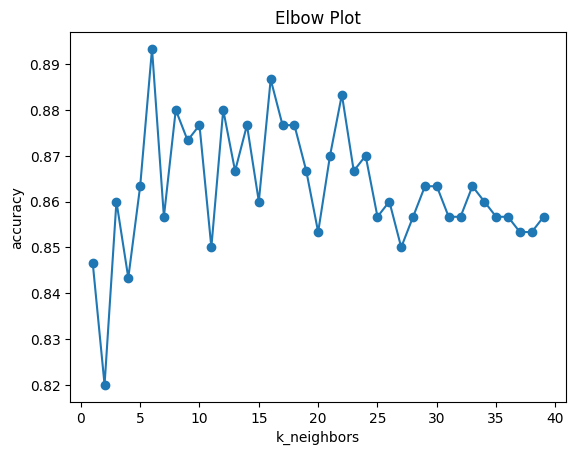

In [16]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    accuracy_rate.append(knn.score(x_test, y_test))

plt.plot(range(1,40), accuracy_rate, marker='o',)
plt.title("Elbow Plot")
plt.xlabel('k_neighbors')
plt.ylabel('accuracy')
plt.show()